# Logistic Regression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# data Reading

In [2]:
data = pd.read_csv("./BankNote_Authentication.csv")

In [3]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Describe 

In [4]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# Information about the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


# Finding correlation between the columns

In [6]:
data.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


# Class count visualization 

In [7]:
from collections import Counter

c = Counter(data['class'])
print(f"Classes of the data {c.keys()}")
print(f"count of the data {c.values()}")


Classes of the data dict_keys([0, 1])
count of the data dict_values([762, 610])


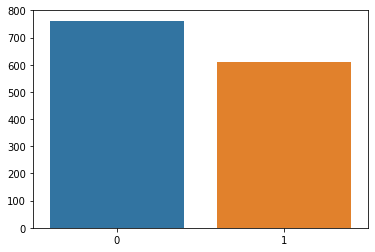

In [8]:
x = list(c.keys())
xval = []
h = list(c.values())

for i in x:
    xval.append(str(i))

sns.barplot(x=xval,y=h,data=data)
plt.show()

# Shuffling the data

In [9]:
from sklearn.utils import shuffle


data_S = shuffle(data.values)

In [10]:
data_S

array([[ 3.2303 ,  7.8384 , -3.5348 , -1.2151 ,  0.     ],
       [-2.234  , -7.0314 ,  7.4936 ,  0.61334,  1.     ],
       [-1.9922 , 11.6542 ,  2.6542 , -5.2107 ,  0.     ],
       ...,
       [ 4.5707 ,  7.2094 , -3.2794 , -1.4944 ,  0.     ],
       [-2.659  , -1.6058 ,  1.3647 ,  0.16464,  1.     ],
       [ 2.0911 ,  0.94358,  4.5512 ,  1.234  ,  0.     ]])

# Features and Labels 

In [11]:
X = data_S[:, :-1]
Y = data_S[:, -1]

# Scaling the data 

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [13]:
X = sc.fit_transform(X)

# Splitting the data 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression().fit(X_train, Y_train)

In [16]:
y_pred = lg.predict(X_test)

# Metrics Of the data 

In [17]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Test Accuracy score of the data {accuracy_score(y_pred, Y_test)}")
print(f"Train Accuracy score of the data {accuracy_score(lg.predict(X_train), Y_train)}")

Test Accuracy score of the data 0.9854545454545455
Train Accuracy score of the data 0.9808568824065633


# classification report of the data 

In [18]:
print("********* TRAIN CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(lg.predict(X_train), Y_train))

print(" ")

print("********* TEST CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(y_pred, Y_test))

********* TRAIN CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       590
         1.0       1.00      0.96      0.98       507

    accuracy                           0.98      1097
   macro avg       0.98      0.98      0.98      1097
weighted avg       0.98      0.98      0.98      1097

 
********* TEST CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       151
         1.0       1.00      0.97      0.98       124

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275



# Neural Network

In [19]:
import keras

In [20]:
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.utils import to_categorical 

# Validation Data

In [21]:
# Validation data 

X_train, X_val, Y_train, Y_val= train_test_split(X_train, Y_train, test_size=0.2)

# To categorical

In [22]:
Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_test, num_classes=2)
Y_val = to_categorical(Y_val, num_classes=2)

# Model

In [23]:
model = Sequential()

model.add(Dense(1024, input_shape=(X_train.shape[1],)))
model.add(Dense(512, activation="relu"))
model.add(Dense(216, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              5120      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 216)               110808    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               27776     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 6

# Compile 

In [25]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model

In [26]:
history = model.fit(X_train, Y_train,
         batch_size=128,epochs=100,
         validation_data = (X_val, Y_val))

Epoch 1/100
7/7 [==============================] - 2s 133ms/step - loss: 0.4797 - accuracy: 0.7835 - val_loss: 0.1058 - val_accuracy: 0.9455
Epoch 2/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0774 - accuracy: 0.9617 - val_loss: 0.0275 - val_accuracy: 0.9955
Epoch 3/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0304 - accuracy: 0.9829 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==============================] - 0s 30ms/step - loss: 0.0234 - accuracy: 0.9901 - val_loss: 0.3741 - val_accuracy: 0.9182
Epoch 5/100
7/7 [==============================] - 0s 35ms/step - loss: 0.0719 - accuracy: 0.9770 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 6/100
7/7 [==============================] - 0s 36ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/100
7/7 [==============================] - 0s 37ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 8/100
7/7 [==

7/7 [==============================] - 0s 36ms/step - loss: 2.1443e-09 - accuracy: 1.0000 - val_loss: 7.0442e-09 - val_accuracy: 1.0000
Epoch 57/100
7/7 [==============================] - 0s 41ms/step - loss: 1.1149e-09 - accuracy: 1.0000 - val_loss: 4.8767e-09 - val_accuracy: 1.0000
Epoch 58/100
7/7 [==============================] - 0s 34ms/step - loss: 9.5189e-10 - accuracy: 1.0000 - val_loss: 3.7930e-09 - val_accuracy: 1.0000
Epoch 59/100
7/7 [==============================] - 0s 37ms/step - loss: 4.7359e-10 - accuracy: 1.0000 - val_loss: 4.3349e-09 - val_accuracy: 1.0000
Epoch 60/100
7/7 [==============================] - 0s 39ms/step - loss: 9.2567e-10 - accuracy: 1.0000 - val_loss: 4.3349e-09 - val_accuracy: 1.0000
Epoch 61/100
7/7 [==============================] - 0s 36ms/step - loss: 7.6851e-10 - accuracy: 1.0000 - val_loss: 4.3349e-09 - val_accuracy: 1.0000
Epoch 62/100
7/7 [==============================] - 0s 33ms/step - loss: 9.0432e-10 - accuracy: 1.0000 - val_loss: 5.41

# Visualizing the model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


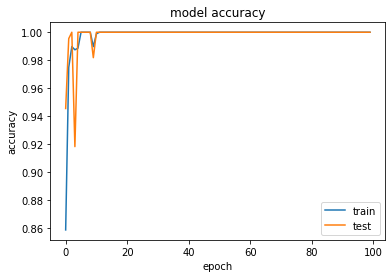

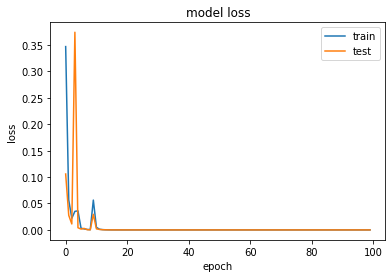

In [27]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


#Evaluating Model
score  = model.predict_classes(X_test)


# Converting from categorical to normal classes

In [28]:

def cate(Y_test):
    Y_test_ = []
    for i in Y_test:
        Y_test_.append(np.argmax(i))
        
    return Y_test_

Y_train_ = cate(Y_train)
Y_test_ = cate(Y_test)

# Accuracy Score 

In [29]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Test Accuracy score of the data {accuracy_score(score, Y_test_)}")
print(f"Train Accuracy score of the data {accuracy_score(model.predict_classes(X_train), Y_train_)}")

Test Accuracy score of the data 1.0
Train Accuracy score of the data 1.0


# Classification Report

In [30]:
print("********* TRAIN CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(model.predict_classes(X_train), Y_train_))

print(" ")

print("********* TEST CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(score, Y_test_))

********* TRAIN CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       497
           1       1.00      1.00      1.00       380

    accuracy                           1.00       877
   macro avg       1.00      1.00      1.00       877
weighted avg       1.00      1.00      1.00       877

 
********* TEST CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       120

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

